In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Weather

In [19]:
weather=pd.read_csv('data/weather.csv', encoding='utf-8')
#2019-9-12
weather=weather[(weather['일시']<'2019-09-12') | (weather['일시']>'2019-09-13')]
weather.to_csv("data/view_weather.csv",mode='w')

In [20]:
weather.head()

,지점,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,174,2019-08-20 00:00,21.5,NaN,NaN,NaN,0.2,NaN,0.0,NaN,...,12.0,229.0,NaN,NaN,23.1,NaN,NaN,NaN,NaN,NaN
1,174,2019-08-20 01:00,21.5,NaN,NaN,NaN,0.1,NaN,0.0,NaN,...,14.0,225.0,NaN,NaN,22.9,NaN,NaN,NaN,NaN,NaN
2,174,2019-08-20 02:00,21.1,NaN,NaN,NaN,0.4,NaN,0.0,NaN,...,14.0,179.0,NaN,NaN,22.2,NaN,NaN,NaN,NaN,NaN
3,174,2019-08-20 03:00,20.4,NaN,NaN,NaN,0.3,NaN,0.0,NaN,...,NaN,167.0,NaN,NaN,21.6,NaN,NaN,NaN,NaN,NaN
4,174,2019-08-20 04:00,20.2,NaN,NaN,NaN,0.0,NaN,0.0,NaN,...,NaN,179.0,NaN,NaN,21.2,NaN,NaN,NaN,NaN,NaN


In [21]:
(weather.isnull().sum()/1152)*100

지점                0.000000
일시                0.000000
기온(°C)            0.868056
기온 QC플래그         97.048611
강수량(mm)          77.864583
강수량 QC플래그        72.829861
풍속(m/s)           1.041667
풍속 QC플래그         97.916667
풍향(16방위)          1.041667
풍향 QC플래그         97.916667
습도(%)             0.868056
습도 QC플래그         97.048611
증기압(hPa)          0.868056
이슬점온도(°C)         1.128472
현지기압(hPa)         0.954861
현지기압 QC플래그       96.961806
해면기압(hPa)         0.954861
해면기압 QC플래그       96.961806
일조(hr)           44.010417
일조 QC플래그         54.947917
일사(MJ/m2)        97.916667
적설(cm)           97.916667
3시간신적설(cm)       97.916667
전운량(10분위)         0.347222
중하층운량(10분위)       1.215278
운형(운형약어)         97.916667
최저운고(100m )      30.295139
시정(10m)           0.173611
지면상태(지면상태코드)     97.916667
현상번호(국내식)        97.916667
지면온도(°C)          0.954861
지면온도 QC플래그       96.961806
5cm 지중온도(°C)     97.916667
10cm 지중온도(°C)    97.916667
20cm 지중온도(°C)    97.916667
30cm 지중온도(°C)    97.916667
dtype: float64

In [22]:
idx=["일시","기온(°C)",
"강수량(mm)",
"풍속(m/s)","풍향(16방위)",
"습도(%)",
#"증기압(hPa)",
"이슬점온도(°C)",
"현지기압(hPa)",
#"해면기압(hPa)",
"일조(hr)",
#"전운량(10분위)",
#"중하층운량(10분위)",
"시정(10m)",
"지면온도(°C)"
]

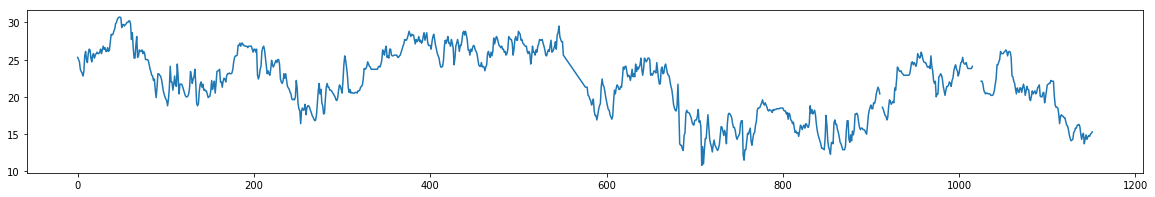

In [23]:
plt.figure(figsize=(20,3))
plt.plot(weather["증기압(hPa)"])
plt.show()

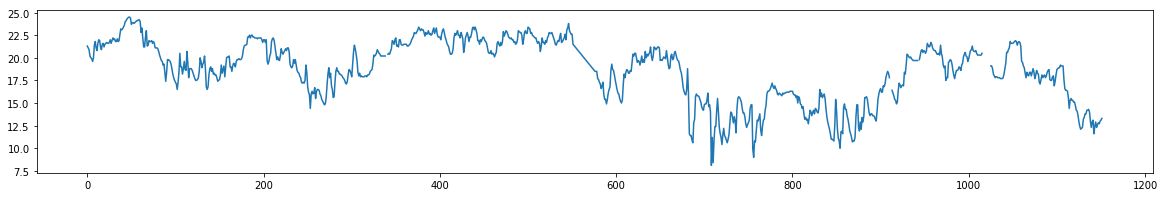

In [24]:
plt.figure(figsize=(20,3))
plt.plot(weather["이슬점온도(°C)"])
plt.show()

In [25]:
weather=weather[idx]
weather.to_csv("data/view_weather.csv",mode='w')

In [26]:
(weather.isnull().sum()/1128)*100

일시            0.000000
기온(°C)        0.886525
강수량(mm)      79.521277
풍속(m/s)       1.063830
풍향(16방위)      1.063830
습도(%)         0.886525
이슬점온도(°C)     1.152482
현지기압(hPa)     0.975177
일조(hr)       44.946809
시정(10m)       0.177305
지면온도(°C)      0.975177
dtype: float64

In [27]:
weather['일조(hr)'] = weather['일조(hr)'].fillna(0)
weather['강수량(mm)'] = weather['강수량(mm)'].fillna(0)

In [28]:
(weather.isnull().sum()/1128)*100

일시           0.000000
기온(°C)       0.886525
강수량(mm)      0.000000
풍속(m/s)      1.063830
풍향(16방위)     1.063830
습도(%)        0.886525
이슬점온도(°C)    1.152482
현지기압(hPa)    0.975177
일조(hr)       0.000000
시정(10m)      0.177305
지면온도(°C)     0.975177
dtype: float64

In [29]:
#wind=pd.DataFrame({'풍향(sin)': np.sin(np.pi*weather["풍향(16방위)"]/360),'풍향(cos)': np.cos(np.pi*weather["풍향(16방위)"]/360)})
wind=pd.DataFrame({'풍향': np.cos(np.pi*weather["풍향(16방위)"]/360)})
weather=pd.concat((weather,wind),axis=1)
weather=weather.drop("풍향(16방위)",axis=1)

In [30]:
weather.head()

,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),이슬점온도(°C),현지기압(hPa),일조(hr),시정(10m),지면온도(°C),풍향
0,2019-08-20 00:00,21.5,0.0,0.2,99.0,21.3,991.2,0.0,229.0,23.1,1.0
1,2019-08-20 01:00,21.5,0.0,0.1,98.0,21.1,991.1,0.0,225.0,22.9,1.0
2,2019-08-20 02:00,21.1,0.0,0.4,99.0,20.9,990.8,0.0,179.0,22.2,1.0
3,2019-08-20 03:00,20.4,0.0,0.3,99.0,20.2,990.6,0.0,167.0,21.6,1.0
4,2019-08-20 04:00,20.2,0.0,0.0,99.0,20.0,990.9,0.0,179.0,21.2,1.0


In [31]:
weather_c=weather.interpolate(method='linear')
weather_c.to_csv("data/weather_c.csv",mode='w',index=False)
print(weather_c.shape)
#plt.figure(figsize=(20,3))
#plt.plot(weather_c.values[:,1],'r')
#plt.plot(weather.values[:,1],'g')

(1128, 11)


/home/vislab/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


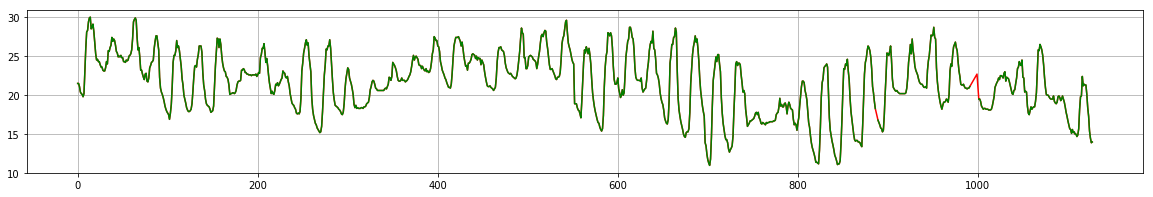

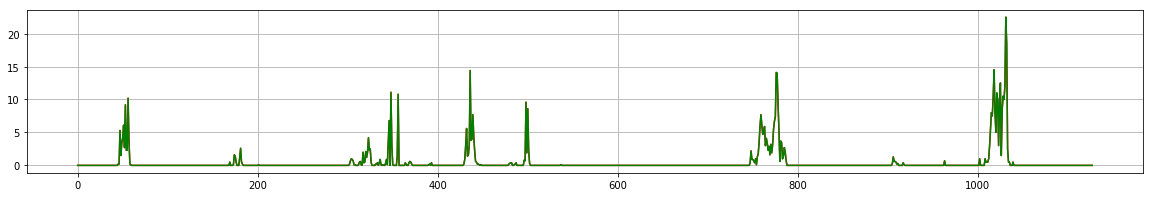

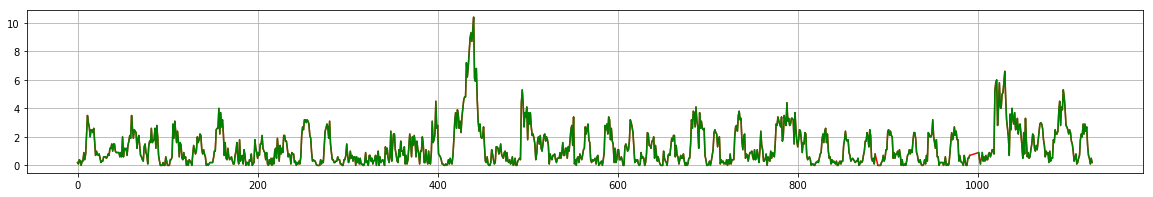

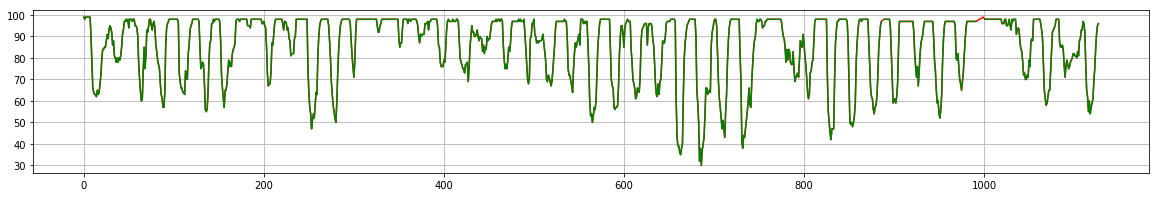

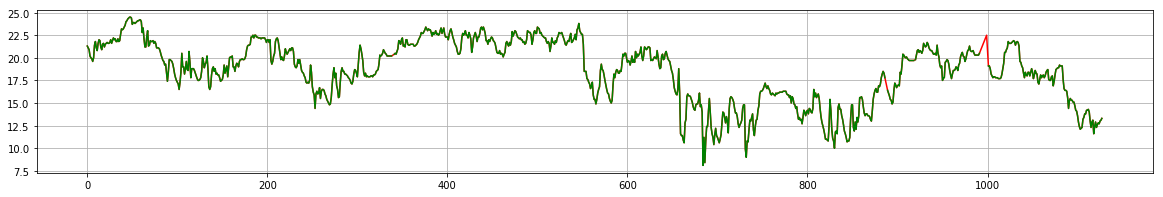

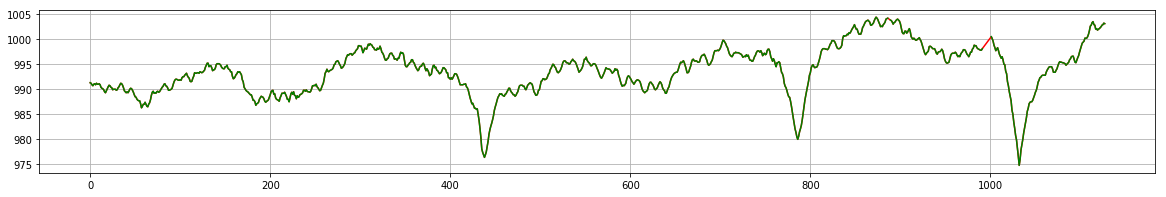

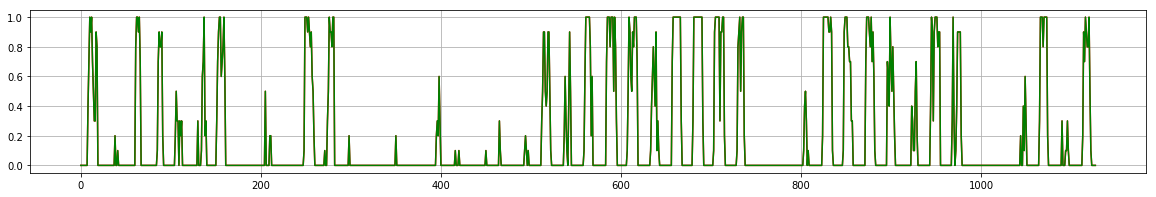

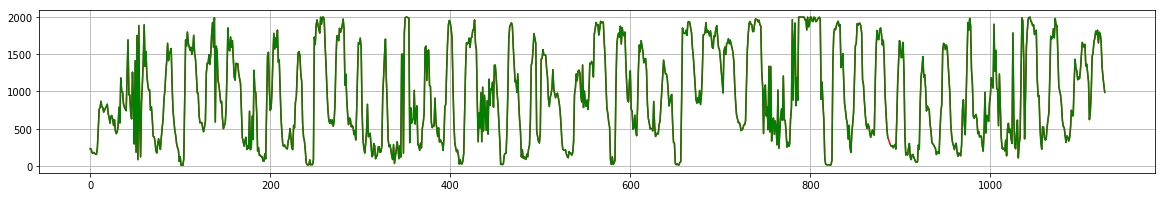

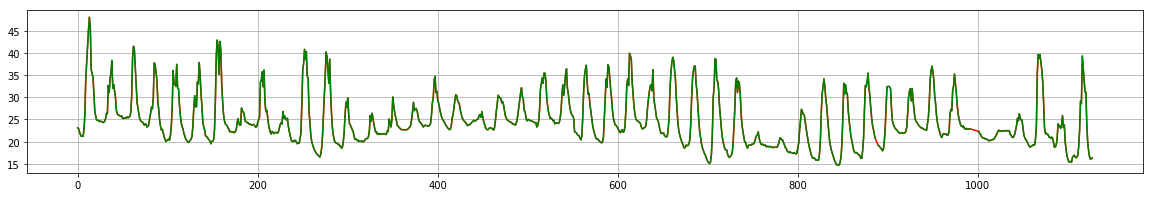

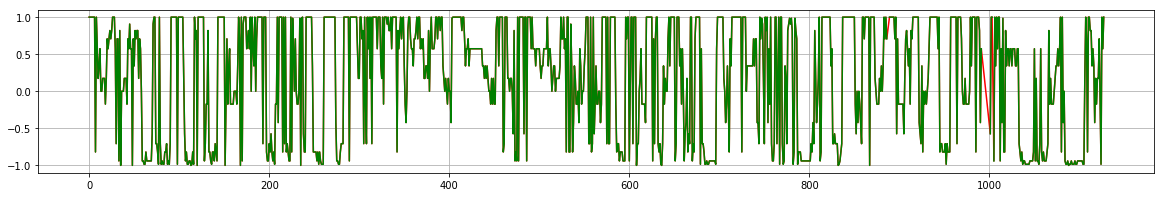

In [17]:
for i in range(1,weather_c.shape[1]):
    fig=plt.figure(figsize=(20,3))
    fig.add_subplot(1,1,1).plot(weather_c.values[:,i],'r')
    fig.add_subplot(1,1,1).plot(weather.values[:,i],'g')
    #fig.add_subplot(1,1,1).title.set_text(weather.columns[2])
    fig.add_subplot(1,1,1).grid()
plt.show()

In [18]:
weather_c.columns[[5,6,7,8]]

Index(['이슬점온도(°C)', '현지기압(hPa)', '일조(hr)', '시정(10m)'], dtype='object')

# Air

In [12]:
air=pd.read_csv('data/air.csv', encoding='utf-8')

#2019-9-12
air=air[(air['날짜']<'2019-09-11:24') | (air['날짜']>='2019-09-12:24')]
air.to_csv("data/view_air.csv",mode='w')

,날짜,pm10,오존,이산화질소,일산화탄소,아황산가스
0,2019-08-19:24,38.0,0.030,0.009,0.4,0.003
1,2019-08-20:01,37.0,0.028,0.008,0.4,0.004
2,2019-08-20:02,48.0,0.027,0.007,0.5,0.003
3,2019-08-20:03,48.0,0.025,0.007,0.5,0.003
4,2019-08-20:04,47.0,0.024,0.007,0.5,0.003


with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(air)

In [16]:
(air.isnull().sum()/1152)

날짜       0.000000
pm10     0.004340
오존       0.013889
이산화질소    0.013889
일산화탄소    0.013889
아황산가스    0.024306
dtype: float64

In [16]:
air_c=air.interpolate(method='linear')
air_c.to_csv("data/air_c.csv",mode='w',index=False)

NameError: name 'air' is not defined

/home/vislab/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


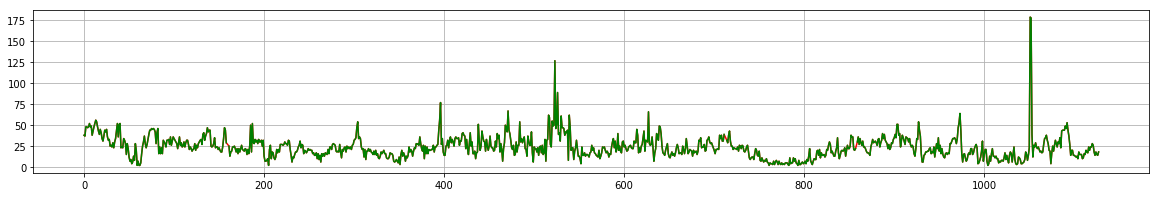

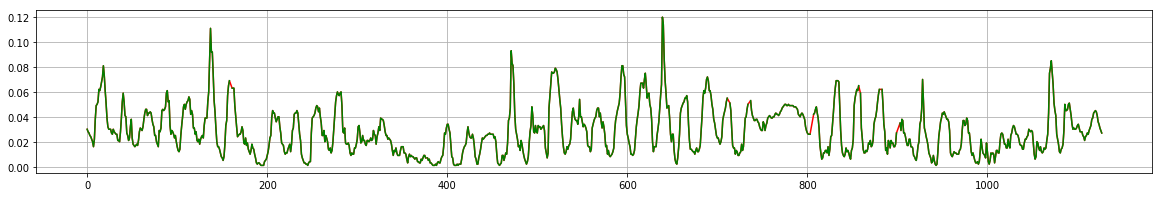

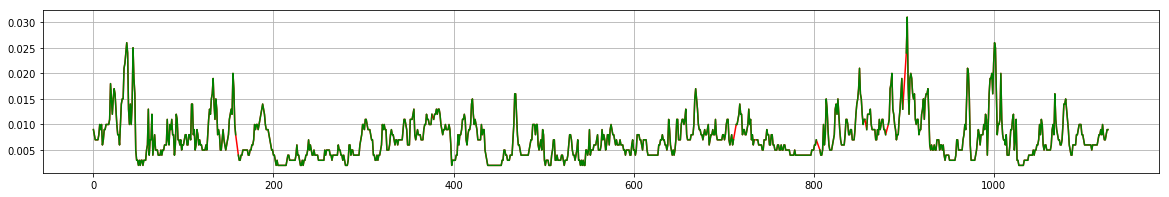

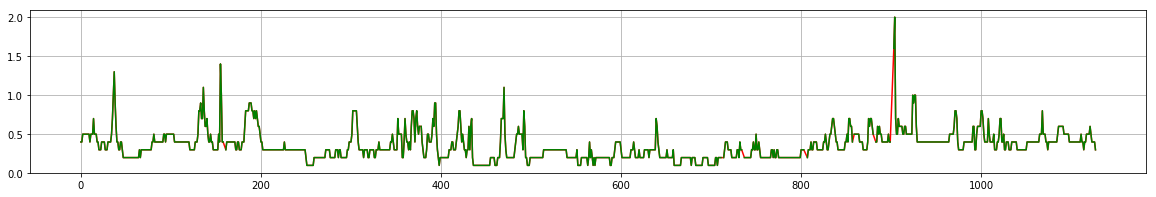

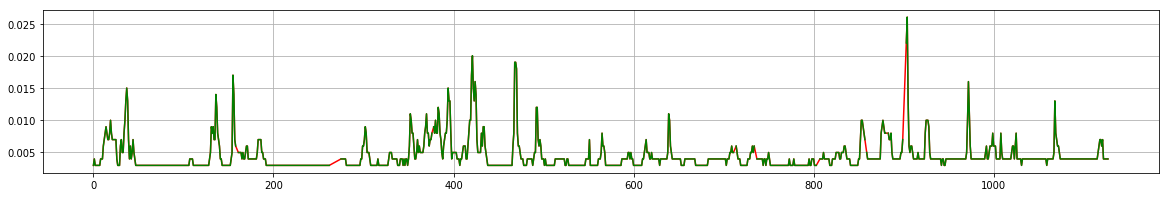

In [20]:
for i in range(1,air_c.shape[1]):
    fig=plt.figure(figsize=(20,3))
    fig.add_subplot(1,1,1).plot(air_c.values[:,i],'r')
    fig.add_subplot(1,1,1).plot(air.values[:,i],'g')
    #fig.add_subplot(1,1,1).title.set_text(weather.columns[2])
    fig.add_subplot(1,1,1).grid()
plt.show()